Hey

In [106]:
import pandas as pd
import lightgbm as ltb
import numpy as np
import re


from scipy.stats import linregress
import scipy.linalg

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA


from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import preprocessing

import joblib

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5



In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_seq_items', 1000)

In [11]:
#MY COMPUTER

#READING INITIAL TRAIN DATA
# data_traff_train = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_traff.sas7bdat')
# data_train = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_fe.sas7bdat')

#READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_test.sas7bdat')


#WRITING MERGED TRAIN AND TEST DATA TO PARQUET
data_train.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_train.parquet.gzip',compression='gzip')
data_test.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/test/data_test.parquet.gzip',compression='gzip')

# READING INITIAL TRAIN AND TEST DATA FROM PARQUET
# data_train = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_train.parquet.gzip')
# data_test = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/test/data_test.parquet.gzip')


In [3]:
# ED'S COMPUTER

# READING INITIAL TRAIN DATA
# data_traff_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_traff.sas7bdat')
# data_train = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/train/hash_school_dpi_model_fe.sas7bdat')

#WRITING INITIAL TRAIN DATA TO PARQUET
# data_traff.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/hash_school_dpi_model_traff.parquet.gzip',compression='gzip')
# 

# READING INITIAL TEST DATA
# data_traff_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_traff_test.sas7bdat')
# data_test = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_fe_test.sas7bdat')
# data_test2 = pd.read_sas('C:/Users/Edward/Documents/Appleolga/Final_pro/model2/test/hash_school_dpi_model_test.sas7bdat')

#WRITING MERGED TRAIN AND TEST DATA TO PARQUET
# data_train.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip',compression='gzip')
# data_test.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip',compression='gzip')

# READING INITIAL TRAIN AND TEST DATA FROM PARQUET
data_train= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_train.parquet.gzip')
data_test = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_test.parquet.gzip')



In [ ]:
#DUPLICATES CLEANING AND MERGING INITIAL DATA FILES

# print(data_train.shape)
# print(data_traff_train.shape)
# data_traff_train = data_traff_train.drop_duplicates()
# data_train = data_train.drop_duplicates()
# print(data_train.shape)
# print(data_traff_train.shape)

# data_train = data_train.merge(data_traff_train, on = 'abon_id')
# del data_traff_train

# print(data_test.shape)
# print(data_test2.shape)
# print(data_traff_test.shape)
# data_test = data_test.drop_duplicates()
# data_test2 = data_test2.drop_duplicates()
# data_traff_test = data_traff_test.drop_duplicates()
# print(data_test.shape)
# print(data_test2.shape)
# print(data_traff_test.shape)

# data_test = data_test.merge(data_test2, on = 'abon_id').merge(data_traff_test, on = 'abon_id')
# del data_test2
# del data_traff_test


In [ ]:
data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
data_nulls_less_60p = pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_nulls_less_60p.parquet.gzip')
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/train/data_few_nans_not_univalue_target_corr.csv', \
                                                    index_col='index')

In [ ]:
data_nulls_less_60p_outliers_mask = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p_outliers_mask.parquet.gzip')
data_nulls_less_60p = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip')
data_few_nans_not_univalue_target_corr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_few_nans_not_univalue_target_corr.csv', \
                                                    index_col='index')

data_test = pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/test/data_full_test.parquet.gzip')


In [86]:
# data_train_info = pd.DataFrame(data_train.isnull().sum()/data_train['abon_id'].size, columns=['perc_nulls'])
# data_train_info = data_train_info.assign(target_corr = data_train.corr()['target'])

# data_train_info.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_info.parquet.gzip',compression='gzip')
# data_train_info.to_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_info.parquet.gzip',compression='gzip')

data_train_info= pd.read_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/data_train_info.parquet.gzip')
# data_train_info= pd.read_parquet('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_parquet/data_train_info.parquet.gzip')

In [25]:
# data_train_info.sort_values(by = ['perc_nulls'], ascending = False).style.format({'perc_nulls':'{:.2%}', 'target_corr':'{:.2%}'})

In [26]:
# print(data_train_info[data_train_info['target_corr'].abs() > 0.1].shape)
# data_train_info[data_train_info['target_corr'].abs() > 0.1].\
#             sort_values(by = 'perc_nulls', ascending = False).\
#             style.format({'perc_nulls':'{:.2%}', 'target_corr':'{:.2%}'})

In [ ]:
bs_delte_mb_change_tp = data_train.loc[ : , ['bs_delte_mb_change_tp', 'target']][(~data_train['bs_delte_mb_change_tp'].isnull())&\
                                                                 data_train['bs_delte_mb_change_tp'] != 0]

ax1 = bs_delte_mb_change_tp.plot.scatter(x = 'target', y = 'bs_delte_mb_change_tp')

In [5]:
data_descr = pd.read_csv('C:/Users/Edward/Documents/Appleolga/Final_pro/data_descr_eng.csv', names=['feature', 'descr'])

# data_descr = pd.read_csv('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data_descr.csv', names=['feature', 'descr'])

In [87]:
data_train_info = data_train_info[(data_train_info['target_corr'].abs() > 0.1)&\
                                 (data_train_info['perc_nulls'] < 0.4)]

data_train_info = pd.merge(data_train_info, data_descr, how='left', left_index=True, right_on='feature')
data_train_info.loc[data_train_info['descr'].isna(), 'descr'] = data_train_info.loc[data_train_info['descr'].isna(), 'feature']

In [89]:
data_train_info = data_train_info.assign(feature_clear = data_train_info['descr'])

expression = ' - стат.метрика'
escaped_expression = re.escape(expression)

data_train_info['feature_clear'] = data_train_info.feature_clear.apply(lambda x: re.sub(\
                                                                       escaped_expression, '', str(x)))

In [91]:
best_target_corr = data_train_info.groupby('feature_clear').max('target_corr')
cols_to_use = list(data_train_info.loc[data_train_info['target_corr'].\
                                       isin(best_target_corr.target_corr)].feature)
len(cols_to_use)

74

In [9]:
def mark_outliers(df, cols, outlier_coeff = 1.5): 
    outliers_mask = df.copy()
    counter = 1
    for col in cols:
        
        p75, p25 = df[col].quantile(0.75), df[col].quantile(0.25)
        IQR_col = p75 - p25
        upper, lower = p75 + outlier_coeff*IQR_col, p25 - outlier_coeff*IQR_col
        outliers_mask[col] = df[col].apply(lambda x: True if(x > upper or x < lower) else False)
        if (counter%100 == 0):
            print(counter)
        counter += 1
    return outliers_mask        

# # test = pd.DataFrame(data = np.array([1,2,5,100,2,5,1000]), columns = ['test'])
# # mark_outliers(test, test)

In [92]:
data_train_outliers_mask = mark_outliers(data_train[cols_to_use], cols_to_use)

In [11]:
def df_full_descr (df, cols, outliers_mask_df):
    
    df_full_descr = pd.DataFrame(columns=['col', 
                                          '%of_fr_univalue',
                                          '%of_unfr_univalue',
                                          'freq_value', 
                                          'if_cat',
                                          '%outliers',
                                          '%nans'])
    
    df_length = df.shape[0]
    
    for col in cols:
        
        value_count_info = df[col].value_counts().sort_values(ascending = False)
        
        if (np.array_equal(value_count_info.index, [1,0]) or np.array_equal(value_count_info.index,[0,1])):
            if_cat = 1 
        else: 
            if_cat = 0
            
        freq_value = value_count_info.index[0]
        freq_value_count = value_count_info.iloc[0]/df_length
        #print(freq_value_count)
        try:
            unfreq_value_count = value_count_info.iloc[1]/df_length
        except:
            unfreq_value_count = np.nan
        #print(unfreq_value_count)
        perc_outl = outliers_mask_df[col].sum()/df_length
        perc_nans = df[col].isnull().sum()/df_length
        
        #print(freq_count)
        df_full_descr = df_full_descr.append({'col': col, 
                                              '%of_fr_univalue': freq_value_count,
                                              '%of_unfr_univalue': unfreq_value_count,
                                              'if_cat': if_cat,
                                              '%outliers': perc_outl,
                                              '%nans': perc_nans,
                                              'freq_value': freq_value}, ignore_index=True)
        
    return df_full_descr.sort_values(by = ['%of_fr_univalue', '%outliers','%nans'], ascending=False)   

# data_nulls_less_60p_temp_mask = mark_outliers(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'])
# temp = univalue_feauture_info(data_nulls_less_60p, ['Balance_uah', 'CALCULATION_METHOD_ID', 'device_brand_other'],data_nulls_less_60p_temp_mask)
# temp

In [93]:
data_train_filtered_info = df_full_descr(data_train[cols_to_use], cols_to_use, data_train_outliers_mask)


In [95]:
data_train_filtered_info = data_train_filtered_info.merge(data_train_info[['target_corr', 'feature']], \
                                                          how='left', left_on='col', right_on='feature')
data_train_filtered_info = data_train_filtered_info.drop('feature', axis = 1)

In [19]:
def highlight_p75(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.quantile(0.75)
    return ['background-color: cyan' if v else '' for v in is_max]

def highlight_p95(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s >= s.quantile(0.95)
    return ['background-color: yellow' if v else '' for v in is_max]


In [96]:
cat_cols = data_train_filtered_info[data_train_filtered_info['if_cat'] == 1]
num_cols = data_train_filtered_info[data_train_filtered_info['if_cat'] == 0]

In [97]:
cat_cols_style = cat_cols.style.apply(highlight_p75, subset=['%outliers', '%nans']).\
                 format({'%of_fr_univalue': "{:.2%}",
                         '%of_unfr_univalue': "{:.2%}",
                         '%outliers': "{:.2%}",
                         '%nans': "{:.2%}", 
                         'target_corr': "{:.2%}"})
cat_cols_style

,col,%of_fr_univalue,%of_unfr_univalue,freq_value,if_cat,%outliers,%nans,target_corr
0,device_brand_apple,78.60%,13.36%,0.000000,1,13.36%,8.04%,11.48%
3,device_has_LTE_BAND_3,62.30%,33.81%,1.000000,1,0.00%,3.89%,10.14%
4,active_ppm,62.20%,21.06%,1.000000,1,0.00%,16.74%,11.85%
7,device_has_lte,48.71%,43.25%,1.000000,1,0.00%,8.04%,10.05%


In [37]:
cat_cols_list = cat_cols['col'].tolist()

target_by_cat_cols = pd.DataFrame(index=cat_cols_list, columns=['0', '1', '0_to_1_rate'])


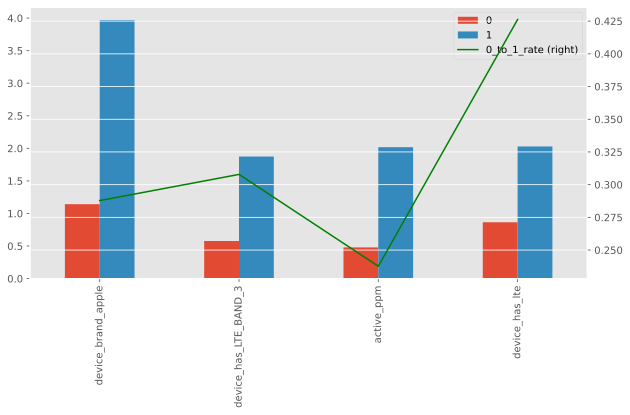

In [41]:
for col in cat_cols_list:
    temp = data_train[cat_cols_list+['target']].pivot_table(columns=col,
                                                            values='target', 
                                                            aggfunc='median').fillna(0).applymap(float)

    target_by_cat_cols.loc[col]['0'] = temp.values[0][0]
    target_by_cat_cols.loc[col]['1'] = temp.values[0][1]
    target_by_cat_cols.loc[col]['0_to_1_rate'] = temp.values[0][0]/temp.values[0][1]


    
ax1 = target_by_cat_cols.loc[:, ['0', '1']].plot(kind = 'bar', figsize = (10,5), rot = 90);
ax2 = target_by_cat_cols['0_to_1_rate'].plot(secondary_y=True, colormap = 'ocean', rot = 90, legend = True);


In [43]:
target_by_cat_cols

,0,1,0_to_1_rate
device_brand_apple,1.14232,3.968569,0.287842
device_has_LTE_BAND_3,0.57689,1.874033,0.307834
active_ppm,0.479359,2.017467,0.237604
device_has_lte,0.864738,2.028824,0.426226


In [101]:
num_cols['fr+nan'] = num_cols['%of_fr_univalue'] + num_cols['%nans']
print(num_cols.shape)

#defining columns with 100% of univalue + nan
cols_to_delete = num_cols[num_cols['fr+nan'] == 1]['col']

#filtering out columns with 100% of univalue + nan
num_cols = num_cols[num_cols['fr+nan'] != 1]

print(num_cols.shape)


num_cols = num_cols.sort_values(by = ['target_corr'], ascending = True)
num_cols_style = num_cols.style.apply(highlight_p75, \
                                      subset=['%outliers', '%nans']).format({'%of_fr_univalue': "{:.2%}",
                                                                             '%of_unfr_univalue': "{:.2%}",
                                                                             '%outliers': "{:.2%}",
                                                                             '%nans': "{:.2%}", 
                                                                             'fr+nan': "{:.2%}", 
                                                                             'target_corr': "{:.2%}"})
num_cols_style

(70, 9)
(70, 9)


,col,%of_fr_univalue,%of_unfr_univalue,freq_value,if_cat,%outliers,%nans,target_corr,fr+nan
45,MV_ap_innet_out_v,10.24%,6.87%,0.261482,0,4.58%,25.51%,-26.09%,35.75%
44,MV_ap_pstn_out_v,10.24%,6.93%,0.179390,0,1.85%,25.51%,-19.05%,35.75%
43,MV_ap_omo_out_v,10.24%,6.92%,1.280161,0,1.96%,25.51%,-15.77%,35.75%
12,MV_ap_s,41.92%,6.43%,0.000000,0,2.44%,25.51%,-15.13%,67.43%
63,days_of_last_ppm,2.64%,2.62%,0.480453,0,9.79%,16.74%,-12.09%,19.38%
66,imei_mean_long_days_usage,0.22%,0.21%,53.115185,0,3.12%,2.28%,-11.55%,2.50%
1,MV_dou,68.56%,6.65%,11.792268,0,20.90%,0.29%,10.28%,68.86%
2,MV_dou_net,68.31%,6.69%,11.792268,0,21.11%,0.29%,10.41%,68.60%
49,conn_out_uniq_cnt_mea_mnt1,9.36%,1.72%,0.000000,0,0.08%,0.30%,10.62%,9.66%
37,cnt_paym_6_month,11.89%,11.40%,3.210402,0,5.79%,6.29%,10.70%,18.18%


In [104]:
def highlight_corr_50p_plus(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_high = s >= 0.5
    return ['background-color: red' if v else '' for v in is_high]

In [105]:
num_cols_list = num_cols.col.tolist()
important_cols_corr = data_train[num_cols_list].corr()

important_cols_style = important_cols_corr.style.apply(highlight_corr_50p_plus).format("{:.2%}")

important_cols_style


,MV_ap_innet_out_v,MV_ap_pstn_out_v,MV_ap_omo_out_v,MV_ap_s,days_of_last_ppm,imei_mean_long_days_usage,MV_dou,MV_dou_net,conn_out_uniq_cnt_mea_mnt1,cnt_paym_6_month,voice_in_life_part_mea_mnt3,voice_out_tar_dur_mea_wk1,bs_of_succ_m1,voice_mts_in_nrest_part_mea_mnt3,voice_mts_out_nrest_partmea_mnt3,vas_clc_max_mnt3,voice_in_td_cnt_mea_mnt1,ks_num_part_mea_mnt3,num_act_days_min_mnt1,voice_in_kievstar_part_mea_mnt3,MV_Traf_omo_inc_v_Min,MV_dou_2G_d,voice_out_td_cnt_mea_mnt1,imei_max_price,bs_count_ppm_mn3,imei_mean_price,conn_com_part_mea_mnt3,pay_max_max_mnt1,pay_sum_max_mnt1,TM_ID,MV_dou_3G_d,com_num_part_min_mnt1,MV_Traf_omo_out_v_Min,voice_in_cmpttrs_td_cnt_mea_mnt1,device_price,data_3g_dou_mea_mnt1,MV_dou_omo_out_v,MV_Traf_Cont_out_s_Cnt,MV_Traf_Cont_inc_s_Cnt,bs_ovrl_OMO_CNT_M1,bs_ovrl_OMO_CNT_M2,MV_dou_data,bs_ovrl_OMO_CNT_M3,voice_out_cmpttrs_td_cntmea_mnt3,pay_avg_std_mnt3,MV_dou_4G_d,MV_ARPU,all_cnt_mea_mnt3,content_cnt_mea_mnt3,data_3g_tv_cnt_max_mnt1,dpi_day_cnt,clc_no_vas_roam_std_mnt3,all_clc_mea_mnt3,MV_AP_total,MV_ap_4G_d,data_3g_tar_vol_mea_mnt3,gprs_tar_vol_mea_mnt3,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,MV_Traf_2G_d_Mb,dpi_events,dpi_duration,non_accum_internet_vol_max_mnt3,dpi_upload,traff_m5,traff_m3,dpi_download,traff_m2,traff_m1,target
MV_ap_innet_out_v,100.00%,59.47%,54.53%,35.15%,3.86%,20.31%,3.20%,2.08%,7.34%,-5.11%,-10.71%,9.71%,1.43%,-2.70%,-1.48%,-1.72%,8.04%,-13.85%,5.59%,-13.82%,-7.42%,-14.83%,7.20%,-12.06%,7.59%,-17.50%,-16.23%,-5.77%,-5.81%,-28.63%,-14.90%,-13.48%,-12.77%,-10.26%,-12.05%,-15.28%,-12.44%,-9.65%,-1.58%,-21.69%,-21.15%,-19.38%,-20.70%,-15.02%,-12.93%,-15.22%,-4.01%,-14.39%,-6.99%,-23.06%,-25.39%,-15.77%,-8.19%,-5.12%,-10.84%,-24.13%,-38.57%,-25.60%,-23.04%,-27.34%,-24.88%,-23.80%,-34.64%,-21.99%,-26.46%,-30.28%,-30.67%,-30.84%,-29.74%,-26.09%
MV_ap_pstn_out_v,59.47%,100.00%,88.87%,59.86%,-8.25%,14.63%,4.89%,5.06%,15.88%,3.94%,-10.62%,13.02%,6.22%,-5.84%,-4.82%,-0.55%,11.52%,1.12%,6.54%,-14.02%,7.66%,-8.17%,12.60%,-0.16%,12.38%,-4.97%,-0.57%,13.91%,13.90%,-44.40%,2.60%,0.88%,6.94%,6.64%,-0.05%,1.00%,5.90%,-9.89%,-15.91%,-18.67%,-17.99%,-7.99%,-17.68%,8.15%,-26.86%,-5.63%,16.49%,-1.02%,-21.54%,-7.17%,-12.17%,13.40%,16.53%,17.44%,8.79%,-7.10%,-22.30%,-10.06%,-12.55%,-19.86%,-17.34%,-18.00%,-18.91%,-15.71%,-19.57%,-22.66%,-23.10%,-23.15%,-22.40%,-19.05%
MV_ap_omo_out_v,54.53%,88.87%,100.00%,40.19%,-14.33%,12.98%,9.05%,9.76%,25.29%,1.05%,-4.92%,23.55%,14.12%,-0.45%,1.00%,4.45%,22.13%,3.44%,14.86%,-7.06%,12.76%,-10.93%,23.51%,-1.43%,15.00%,-7.25%,0.85%,7.10%,7.16%,-40.03%,6.96%,3.26%,12.27%,10.32%,-1.07%,4.28%,12.38%,-6.29%,2.96%,-12.88%,-12.29%,-6.29%,-12.21%,11.78%,-16.89%,-3.05%,25.69%,1.07%,-3.19%,-3.49%,-11.83%,20.49%,21.97%,30.23%,22.32%,1.99%,-24.40%,-3.75%,-9.37%,-15.27%,-15.62%,-15.35%,-8.16%,-13.64%,-17.04%,-19.49%,-19.66%,-19.73%,-19.13%,-15.77%
MV_ap_s,35.15%,59.86%,40.19%,100.00%,-5.13%,14.21%,0.37%,0.12%,1.65%,9.72%,-11.86%,-2.91%,4.01%,-10.23%,-9.57%,-9.15%,-3.79%,-0.92%,-5.64%,-16.15%,1.91%,4.75%,-2.87%,6.05%,15.57%,1.84%,-1.12%,22.54%,22.44%,-41.02%,-3.93%,0.30%,1.56%,3.34%,5.88%,-2.52%,-0.55%,-12.36%,-37.06%,-11.07%,-10.49%,-2.83%,-10.05%,4.61%,-19.81%,-9.15%,1.18%,3.54%,-37.97%,-7.28%,-1.78%,3.15%,4.10%,1.79%,-4.25%,-18.22%,-10.36%,-14.59%,-13.59%,-16.57%,-12.26%,-14.90%,-29.29%,-12.47%,-15.30%,-18.00%,-18.71%,-18.73%,-18.06%,-15.13%
days_of_last_ppm,3.86%,-8.25%,-14.33%,-5.13%,100.00%,5.48%,-3.89%,-4.02%,-16.48%,-19.70%,-4.38%,-15.02%,-15.68%,-4.13%,-6.74%,-8.00%,-10.83%,-6.63%,-11.02%,-4.85%,-7.38%,-9.86%,-18.24%,-4.22%,-30.99%,-3.22%,-6.44%,-36.78%,-36.50%,-11.66%,-10.23%,-9.95%,-12.32%,-10.39%,-4.17%,-14.49%,-12.56%,-5.81%,-21.39%,-9.58%,-9.72%,-10.32%,-9.49%,-13.63%,-48.89%,-3.96%,-59.82%,-19.64%,-20.57%,-17.84%,-9.93%,-61.06%,-51.31%,-12.63%,-14.26%,-17.24%,-16.12%,-16.95%,-8.56%,-16.01%,-9.65%,-7.48%,-24.14%,-10.15%,-10.41%,-11.39%,-13.53%,-13.59%,-14.81%,-12.09%
imei_mean_long_days_usage,20.31%,14.63%,12.98%,14.21%,5.48%,100.00%,23.36%,23.23%,22.73%,0.83%,-7.03%,25.83%,

In [112]:
cov = data_train[num_cols_list].cov()
vals, vecs = scipy.linalg.eig(cov)

import decimal

for i, val in enumerate(vals):
    print('var {}: '.format(i+1), decimal.Decimal(val.real))

var 1:  122184478591229804544
var 2:  621148950611800320
var 3:  1859943115882.570556640625
var 4:  8573669027.557376861572265625
var 5:  39371.8612060454688617028295993804931640625
var 6:  117.7706411798063896867461153306066989898681640625
var 7:  102.03522299754791902159922756254673004150390625
var 8:  87.4838694176850566464054281823337078094482421875
var 9:  80.0784810846477199675064184702932834625244140625
var 10:  60.9141003921253059161244891583919525146484375
var 11:  54.80613876171793208413873799145221710205078125
var 12:  33.52093143220384519054277916438877582550048828125
var 13:  29.3931203311984603487871936522424221038818359375
var 14:  22.8585100802857112967103603295981884002685546875
var 15:  23.06136710092895469870200031436979770660400390625
var 16:  17.762809164207620682418564683757722377777099609375
var 17:  16.767392682859462382793935830704867839813232421875
var 18:  13.635854523924098913312263903208076953887939453125
var 19:  10.1961270320314820736484762164764106273651

In [120]:
cov.iloc[[68, 69]

94.91792066103353

In [121]:
totals_for_pca = ['MV_ARPU', 'MV_ap_4G_d', 'MV_AP_total','clc_no_vas_roam_std_mnt3','all_clc_mea_mnt3']
dpi_for_pca = ['dpi_duration', 'dpi_upload', 'dpi_download', 'dpi_events']

In [122]:
traffic_cols = ['traff_m5', 'traff_m3','traff_m2','traff_m1']
traffic_cols.sort()
traffic_cols_plus_target = ['traff_m5', 'traff_m3','traff_m2','traff_m1', 'target']
traffic_cols_plus_target.sort()

In [123]:
traffic_cols_plus_target

['target', 'traff_m1', 'traff_m2', 'traff_m3', 'traff_m5']

### ANALYSING TRAFFIC TENDENCIES


In [124]:
data_traffic = data_train[traffic_cols_plus_target]
# data_traffic.describe()

data_traffic_test = data_test[traffic_cols_plus_target]

In [125]:
data_traffic = data_traffic.assign(var = data_traffic.apply(lambda x: x.var(), axis=1))
# data_traffic.describe()

data_traffic_test = data_traffic_test.assign(var = data_traffic_test.apply(lambda x: x.var(), axis=1))

In [126]:
var_quantiles = data_traffic['var'].quantile(np.linspace(.1, 1, 19, 0.5))
data_traffic = data_traffic.assign(var_quant = pd.qcut(data_traffic['var'], 10,labels = False))



var_quantiles_test = data_traffic_test['var'].quantile(np.linspace(.1, 1, 19, 0.5))
data_traffic_test = data_traffic_test.assign(var_quant = pd.qcut(data_traffic_test['var'], 10,labels = False))

In [ ]:
data_traffic.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_traffic_with_var_quant.parquet.gzip',compression='gzip')
# data_nulls_less_60p.to_parquet('C:/Users/Edward/Documents/Appleolga/Final_pro/model2_parquet/train/data_nulls_less_60p.parquet.gzip',compression='gzip')

#### Trends

In [127]:
enum = np.arange(1, len(traffic_cols)+1, 1)
data_traffic = data_traffic.assign(slope_traff = data_traffic.apply(lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

data_traffic_test = data_traffic_test.assign(slope_traff = data_traffic_test.apply(lambda x: linregress(enum, x[traffic_cols]).slope, axis=1))

In [ ]:
xmin = X.iloc[:, 0].min()
xmax = X.iloc[:, 0].max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, nrows = 3, sharey=True, figsize=(7, 4))
# fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)

ax = axs[0, 0]
hb = ax.hexbin(X.iloc[:, 0], y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[0])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 1].min()
xmax = X.iloc[:, 1].max()

ax = axs[0, 1]
hb = ax.hexbin(X.iloc[:, 1], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[1])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 2].min()
xmax = X.iloc[:, 2].max()

ax = axs[0, 2]
hb = ax.hexbin(X.iloc[:, 2], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[2])
cb = fig.colorbar(hb, ax=ax)


xmin = X.iloc[:, 3].min()
xmax = X.iloc[:, 3].max()

ax = axs[1, 1]
hb = ax.hexbin(X.iloc[:, 3], y, gridsize=50,  bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title(X.columns[3])
cb = fig.colorbar(hb, ax=ax)
plt.show()


In [ ]:
data.shape

### TRAIN-TEST

In [129]:
# data_traffic = data[traffic_cols]
# data_nulls_filled0 = data_traffic.fillna(0)

data_nulls_filled0 = data_train[cols_to_use].fillna(0)
data_for_pca_totals = data_nulls_filled0[totals_for_pca]
data_for_pca_dpi = data_nulls_filled0[dpi_for_pca]

In [130]:
data_nulls_filled0_test = data_test[cols_to_use].fillna(0)
data_for_pca_totals_test = data_nulls_filled0_test[totals_for_pca]
data_for_pca_dpi_test = data_nulls_filled0_test[dpi_for_pca]

In [131]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_totals)

pca = PCA(random_state=3)
X_pca_totals = pca.fit_transform(X_std)
pd.DataFrame(pca.explained_variance_ratio_).style.format("{:.2%}")


,0
0,82.97%
1,11.08%
2,4.07%
3,1.83%
4,0.05%


In [132]:
sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_totals_test)

pca_test = PCA(random_state=3)
X_pca_totals_test = pca_test.fit_transform(X_std_test)
pd.DataFrame(pca_test.explained_variance_ratio_).style.format("{:.2%}")

,0
0,81.98%
1,11.88%
2,4.10%
3,1.99%
4,0.05%


In [133]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_dpi)

pca = PCA(random_state=3)
X_pca_dpi = pca.fit_transform(X_std)
pd.DataFrame(pca.explained_variance_ratio_).style.format("{:.2%}")

,0
0,68.30%
1,16.84%
2,8.45%
3,6.40%


In [134]:
sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_dpi_test)

pca_test = PCA(random_state=3)
X_pca_dpi_test = pca_test.fit_transform(X_std_test)
pd.DataFrame(pca_test.explained_variance_ratio_).style.format("{:.2%}")

,0
0,70.15%
1,16.10%
2,7.56%
3,6.20%


In [135]:
sc_x_traf = StandardScaler()

X_std = sc_x_traf.fit_transform(data_for_pca_dpi)

pca = PCA(n_components = 2, random_state=3)
X_pca_dpi = pca.fit_transform(X_std)

sc_x_traf_test = StandardScaler()

X_std_test = sc_x_traf_test.fit_transform(data_for_pca_dpi_test)

pca_test = PCA(n_components = 2, random_state=3)
X_pca_dpi_test = pca_test.fit_transform(X_std_test)


In [ ]:
# from sklearn import datasets


# X=X_traf_std
# y=data['target']

# pca = PCA()
# pca.fit(X,y)
# x_new = pca.transform(X)   

# def myplot(score,coeff,labels=None):
#     xs = score[:,0]
#     ys = score[:,1]
#     n = coeff.shape[0]

#     plt.scatter(xs ,ys, c = y) #without scaling
#     for i in range(n):
#         plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
#         if labels is None:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
#         else:
#             plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

# plt.xlabel("PC{}".format(1))
# plt.ylabel("PC{}".format(2))
# plt.grid()

# #Call the function. 
# myplot(x_new[:,0:2], pca. components_) 
# plt.show()

In [ ]:
model = PCA(n_components=5).fit(X_traf_std)
X_pc = model.transform(X_traf_std)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [traffic_cols[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

In [ ]:
df

In [ ]:
xmin = var.min()
xmax = var.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(var, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(var, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import mutual_info_regression
# from matplotlib import pyplot
 
# # feature selection
# def select_features(X_train, y_train, X_test):
#     # configure to select all features
#     fs = SelectKBest(score_func=mutual_info_regression, k='all')
#     # learn relationship from training data
#     fs.fit(X_train, y_train)
#     # transform train input data
#     X_train_fs = fs.transform(X_train)
#     # transform test input data
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs, fs
 
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# # what are scores for the features
# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

In [ ]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#class sklearn.feature_selection.VarianceThreshold(threshold=0.0)
#SPEARMAN Correlation

In [164]:
data_nulls_filled0 = data_train[cols_to_use].drop(totals_for_pca, axis=1).fillna(0)
data_nulls_filled0 = data_nulls_filled0.drop(dpi_for_pca, axis=1)
data_nulls_filled0 = data_nulls_filled0.assign(pca1=X_pca_totals[:, 0], 
                                               pca2=X_pca_dpi[:, 0],
                                               pca3=X_pca_dpi[:, 1], 
                                               var_quant = data_traffic['var_quant'],
                                               slope_traff = data_traffic['slope_traff'])


# data_nulls_filled0 = data[cols].drop(totals_for_pca, axis=1).fillna(0)
# data_nulls_filled0 = data_nulls_filled0.drop(dpi_for_pca, axis=1)
# data_nulls_filled0 = data_nulls_filled0.assign(pca1=X_pca_totals[:, 0], 
#                                                pca2=X_pca_dpi[:, 0],
#                                                pca3=X_pca_dpi[:, 1], 
#                                                var_quant = data_traffic['var_quant'])


# data_nulls_filled0 = data_nulls_filled0.drop('gprs_tar_vol_mea_mnt3', axis=1)


# data_nulls_filled0 = data[cols].fillna(0)

In [137]:
data_nulls_filled0_test = data_test[cols_to_use].drop(totals_for_pca, axis=1).fillna(0)
data_nulls_filled0_test = data_nulls_filled0_test.drop(dpi_for_pca, axis=1).fillna(0)
data_nulls_filled0_test = data_nulls_filled0_test.assign(pca1=X_pca_totals_test[:, 0], 
                                                         pca2=X_pca_dpi_test[:, 0],
                                                         pca3=X_pca_dpi_test[:, 1], 
                                                         var_quant = data_traffic_test['var_quant'], 
                                                         slope_traff = data_traffic_test['slope_traff'])


# data_nulls_filled0_test = data_test[cols].drop(totals_for_pca, axis=1).fillna(0)
# data_nulls_filled0_test = data_nulls_filled0_test.drop(dpi_for_pca, axis=1).fillna(0)
# data_nulls_filled0_test = data_nulls_filled0_test.assign(pca1=X_pca_totals_test[:, 0], 
#                                                          pca2=X_pca_dpi_test[:, 0],
#                                                          pca3=X_pca_dpi_test[:, 1], 
#                                                          var_quant = data_traffic_test['var_quant'])
# # data_nulls_filled0 = data[cols].fillna(0)


# data_nulls_filled0_test = data_nulls_filled0_test.drop('gprs_tar_vol_mea_mnt3', axis=1)

In [138]:
X, y = data_nulls_filled0.loc[:, data_nulls_filled0.columns != 'target'], data_nulls_filled0.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [139]:
X_test_test, y_test_test = data_nulls_filled0_test.loc[:, data_nulls_filled0_test.columns != 'target'], data_nulls_filled0_test.target

In [166]:
big_var = data_nulls_filled0[data_nulls_filled0['var_quant'] == 9]
big_var = big_var.assign(slope_sign = big_var.apply(lambda x: -1 if x['slope_traff'] < 0 \
                                                    else (o if x['slope_traff'] == 0 else 1),
                                                   axis = 1))

In [186]:
big_var[big_var['traff_m1'] == 0].sort_values(by = 'target', ascending=False).head(30)


,TM_ID,device_brand_apple,device_has_lte,device_price,bs_of_succ_m1,MV_dou_net,MV_dou_data,MV_dou_2G_d,MV_dou_3G_d,MV_dou_4G_d,MV_dou_omo_out_v,MV_dou,MV_Traf_2G_d_Mb,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,MV_Traf_Cont_inc_s_Cnt,MV_Traf_Cont_out_s_Cnt,MV_Traf_omo_inc_v_Min,MV_Traf_omo_out_v_Min,MV_ap_innet_out_v,MV_ap_omo_out_v,MV_ap_pstn_out_v,MV_ap_s,days_of_last_ppm,active_ppm,bs_count_ppm_mn3,cnt_paym_6_month,bs_ovrl_OMO_CNT_M3,bs_ovrl_OMO_CNT_M2,bs_ovrl_OMO_CNT_M1,voice_in_life_part_mea_mnt3,voice_in_kievstar_part_mea_mnt3,voice_in_cmpttrs_td_cnt_mea_mnt1,voice_out_cmpttrs_td_cntmea_mnt3,voice_mts_in_nrest_part_mea_mnt3,voice_mts_out_nrest_partmea_mnt3,voice_out_tar_dur_mea_wk1,voice_in_td_cnt_mea_mnt1,voice_out_td_cnt_mea_mnt1,vas_clc_max_mnt3,pay_avg_std_mnt3,pay_max_max_mnt1,pay_sum_max_mnt1,num_act_days_min_mnt1,non_accum_internet_vol_max_mnt3,ks_num_part_mea_mnt3,gprs_tar_vol_mea_mnt3,data_3g_dou_mea_mnt1,data_3g_tar_vol_mea_mnt3,data_3g_tv_cnt_max_mnt1,content_cnt_mea_mnt3,conn_out_uniq_cnt_mea_mnt1,conn_com_part_mea_mnt3,com_num_part_min_mnt1,all_cnt_mea_mnt3,dpi_day_cnt,imei_mean_long_days_usage,imei_mean_price,imei_max_price,device_has_LTE_BAND_3,target,traff_m5,traff_m3,traff_m2,traff_m1,pca1,pca2,pca3,var_quant,slope_traff,slope_sign
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
216885,72.212715,0.0,0.0,0.0,0.693147,8.027098,2.890372,1.609438,1.609438,2.890372,0.693147,8.027098,7.642601,6.124692,10.623467,3.526361,0.000000,0.000000,0.064539,0.066976,0.988383,0.046314,0.000000,10.100026,1.0,1.206949,6.174761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.258528,0.000000,0.000000,0.000000,17.220052,0.000000,6.398595,0.000000,13.595709,0.000000,2.724580,0.000000,0.083333,0.000000,3.808513,16.0,25.128716,42.916654,42.916654,1.0,134.979401,94.537300,108.355533,42.750652,0.0,1.901921,3.600685,0.553932,9,34.921678,1
199320,72.205782,0.0,0.0,230.0,2.995732,11.338681,2.302585,1.098612,2.302585,0.000000,0.000000,11.338681,1.567809,7.235345,0.000000,3.610918,1.386294,1.247990,0.000000,0.000000,0.000000,0.000000,0.000000,13.232033,0.0,0.000000,4.324077,1.206949,0.000000,0.000000,0.000000,0.084865,0.693147,0.000000,0.015304,0.000000,0.000000,3.238678,0.000000,3.553091,2.638370,0.000000,0.000000,1.945910,14.822219,0.093849,5.111486,0.000000,12.757155,0.000000,2.463853,0.000000,0.078645,0.000000,3.921973,8.0,24.595073,29.572707,29.572707,0.0,98.655655,0.000000,2.648476,1.358467,0.0,-2.582286,-0.910850,0.151903,9,0.129001,1
206170,72.212715,0.0,0.0,0.0,3.637586,9.269117,2.944439,2.397895,1.609438,2.833213,0.000000,9.269117,10.431157,7.968563,10.152741,4.060443,0.693147,0.659246,0.000000,0.000000,0.000000,0.000000,0.000000,13.607832,0.0,0.480453,3.210402,0.000000,1.206949,0.000000,0.002081,0.002083,0.000000,0.080043,0.011834,0.005540,0.000000,0.000000,0.000000,1.870170,4.012247,0.000000,0.000000,0.000000,17.289276,0.014468,13.646368,0.000000,13.301814,0.000000,2.885731,0.000000,0.005250,0.000000,4.081766,19.0,37.986449,34.646221,34.646221,0.0,96.904604,21.959176,101.424753,59.472534,0.0,-1.720395,4.666789,3.708933,9,10.782975,1
186848,72.035150,0.0,0.0,0.0,5.068904,10.862541,2.708050,2.484907,1.609438,1.609438,2.397895,10.862541,4.984576,6.642794,6.849627,4.919981,3.688879,2.595255,3.358058,0.069181,0.783442,0.039227,0.000000,11.568144,0.0,0.480453,6.964624,0.000000,3.786566,1.921812,0.019866,0.051383,0.000000,0.980829,0.058039,0.005895,0.000000,2.602690,1.504077,1.361464,3.321521,0.000000,0.000000,1.098612,16.029253,0.073180,11.128180,0.559616,12.274633,3.970292,3.552964,0.693147,0.089390,0.000000,4.851379,13.0,25.750338,24.938320,33.976607,0.0,82.242417,41.457416,9.979176,1.805789,0.0,1.342359,-0.854147,0.144910,9,13.254563,1
228610,72.226573,0.0,0.0,0.0,4.025352,10.100026,3.218876,0.693147,3.218876,0.000000,2.944439,10.100026,0.033678,10.565083,0.000000,3.496508,0.000000,3.146305,3.626117,0.011992,0.875742,0.014639,0.000000,11.103

In [ ]:
# LINEAR REGRESSION RESULTS


# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# Slope: 0.15
# Intercept: 1.30
# RMSE train: 8.584659, test: 8.514558
# R^2 train: 0.474909, test: 0.492442


#hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']
# Slope: 0.04
# Intercept: -2.23
# RMSE train: 8.511254, test: 8.466906
# R^2 train: 0.483850, test: 0.498107


#withou traffic columns with their STD instead
# Slope: 0.02
# Intercept: -3.36
# RMSE train: 8.940543, test: 8.900981
# R^2 train: 0.430470, test: 0.445326


#pca1 and pca2 instead of traffic columns
# Slope: 0.04
# Intercept: 2.00
# RMSE train: 8.640514, test: 8.599313
# R^2 train: 0.468054, test: 0.482287



#all data standard scaled
# Slope: 0.01
# Intercept: 0.00
# RMSE train: 0.000000, test: 8.466906
# R^2 train: 1.000000, test: 0.498107

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi

# Slope: 0.04
# Intercept: 2656217253792.36
# RMSE train: 8.374349, test: 8.331864
# R^2 train: 0.500321, test: 0.513989

# with traffic variance quantiles, different regression model by quantile 
# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data

# Train set results

# RMSE train: 7.998114, test: 8.066895
# R^2 train: 0.543879, test: 0.545170

# Test set results

# RMSE test_test: 8.130670
# R^2 test_test: 0.511574

# with traffic variance quantiles, different regression model by quantile + slope coeff for traffic data
#gprs_tar_vol_mea_mnt3 column dropped based on low coefficients 

# Train set results

# RMSE train: 7.998185, test: 8.067140
# R^2 train: 0.543871, test: 0.545142

# Test set results

# RMSE test_test: 8.130594
# R^2 test_test: 0.511583
    
#Choosing features by regression coefficients did not work out!!!



In [140]:
slr = LinearRegression()

slr.fit(X_train, y_train)


print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print()
print('Train set results')
print()
print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))



y_test_test_pred = slr.predict(X_test_test)

print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test, y_test_test_pred)))

Slope: 0.12
Intercept: -2.06

Train set results

RMSE train: 8.281413, test: 8.452436
R^2 train: 0.511614, test: 0.498035

Test set results

RMSE test_test: 8.531532
R^2 test_test: 0.462455


In [141]:
X_list, y_list = [], []
df_list = []

coeff = []

for g, v in data_nulls_filled0.groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
# df_list = []

for i, j in zip(X_list, y_list):
    df_list.append(train_test_split(i, j, test_size=0.30, train_size = 0.70, random_state = 13))
    

y_train_pred, y_test_pred, y_train, y_test = pd.Series(), pd.Series(), pd.Series(), pd.Series()

for X_tr, X_ts, y_tr, y_ts in df_list:
    slr = LinearRegression()

    slr.fit(X_tr, y_tr)
    train_pred = pd.Series(data = slr.predict(X_tr), index=y_tr.index)
    y_train_pred = y_train_pred.append(train_pred)
#     print(y_train_pred.shape)
    
    test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_pred = y_test_pred.append(test_pred)
    
    y_train = y_train.append(y_tr)
    y_test = y_test.append(y_ts) 
    
    print(str(X_tr['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_tr, train_pred, squared = False),
        mean_squared_error(y_ts, test_pred, squared = False)))
    print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_tr, train_pred),
        r2_score(y_ts, test_pred)))
    
    coeff.append(slr.coef_)    
    
    joblib_file = "joblib_model"+"_q"+str(X_tr['var_quant'].unique()[0])+".pkl"
    joblib.dump(slr, joblib_file)


0 quantile set results

RMSE train: 0.048531, test: 0.047760
R^2 train: 0.822832, test: 0.875926
1 quantile set results

RMSE train: 0.205449, test: 0.207223
R^2 train: 0.762765, test: 0.764719
2 quantile set results

RMSE train: 0.437974, test: 0.439870
R^2 train: 0.679034, test: 0.721313
3 quantile set results

RMSE train: 0.762781, test: 0.757509
R^2 train: 0.649580, test: 0.643294
4 quantile set results

RMSE train: 1.178432, test: 1.175257
R^2 train: 0.654447, test: 0.633694
5 quantile set results

RMSE train: 1.808563, test: 1.807160
R^2 train: 0.612934, test: 0.593849
6 quantile set results

RMSE train: 2.716474, test: 2.726218
R^2 train: 0.587764, test: 0.589746
7 quantile set results

RMSE train: 4.412103, test: 4.463320
R^2 train: 0.586400, test: 0.600592
8 quantile set results

RMSE train: 8.232979, test: 8.328097
R^2 train: 0.529064, test: 0.537280
9 quantile set results

RMSE train: 22.800931, test: 23.433412
R^2 train: 0.145212, test: 0.130042


In [142]:
df_coeff= pd.DataFrame()

for i in coeff:
    
    df_coeff= df_coeff.append(pd.Series(i), ignore_index = True)

df_coeff.columns = X_train.columns

def abs_more_than_0_02(value): 
    
    if abs(value) > 0.02:
        color = 'green'
    else:
        color = 'red'
        
    return 'color: %s' % color
    

df_coeff.T.style.applymap(abs_more_than_0_02)


,0,1,2,3,4,5,6,7,8,9
TM_ID,0.000686,0.009039,0.020862,0.036490,0.076708,0.120528,0.165980,0.268757,0.444129,0.626300
device_brand_apple,0.002152,0.015836,0.033586,0.100774,0.068689,0.081764,0.304383,0.383888,0.842965,2.727713
device_has_lte,0.000630,0.005085,-0.004651,-0.015787,0.035043,0.007405,-0.048459,0.074074,0.076873,0.343509
device_price,0.000009,-0.000007,-0.000033,-0.000087,0.000054,0.000029,-0.000332,-0.000181,-0.000214,-0.001570
bs_of_succ_m1,0.000124,0.000045,0.000276,0.009730,-0.011336,0.010557,0.020612,0.054419,0.027707,0.613421
MV_dou_net,-0.002085,-0.004085,-0.046920,-0.037773,-0.125147,-0.031695,0.016584,0.138375,0.058098,-0.202859
MV_dou_data,-0.002068,-0.011296,-0.002969,-0.032102,-0.076746,-0.166033,-0.131742,-0.275049,0.657740,-0.910136
MV_dou_2G_d,0.002443,0.005478,-0.006690,-0.008427,-0.030977,-0.036049,-0.024160,-0.107044,0.001544,-0.697141
MV_dou_3G_d,0.002253,0.011360,0.018066,0.027087,0.080039,0.058848,0.056157,0.114886,0.085077,-0.477509
MV_dou_4G_d,0.005519,0.019917,0.030116,0.090646,0.093324,0.217453,0.250031,0.387012,0.714489,0.880710


In [143]:
feature_list_by_var_quantile = []
df_coeff = df_coeff.T
for col in df_coeff.columns:
    feature_list_by_var_quantile.append(df_coeff[(df_coeff[col] > 0.02)|(df_coeff[col] < -0.02)].index)


In [144]:
X_list, y_list = [], []
df_list = []


for g, v in data_nulls_filled0_test.groupby('var_quant'):
    
    X_list.append(v.loc[:, v.columns != 'target'])
    y_list.append(v.target)
    
for i, j in zip(X_list, y_list):
    df_list.append([i,j])
    
y_test_test_pred, y_test_test = pd.Series(), pd.Series()

for X_ts, y_ts in df_list:
    
    joblib_file = "joblib_model"+"_q"+str(X_ts['var_quant'].unique()[0])+".pkl"
    slr = joblib.load(joblib_file)
    

    test_test_pred = pd.Series(data = slr.predict(X_ts), index=y_ts.index)
    y_test_test_pred = y_test_test_pred.append(test_test_pred)
    
    
    print(str(X_ts['var_quant'].unique()[0])+' quantile set results')
    print()

    print('RMSE test: {:.6f}'.format(
        mean_squared_error(y_ts, test_test_pred, squared = False)))
    print('R^2 train: {:.6f}'.format(
        r2_score(y_ts, test_test_pred)))
   
    y_test_test = y_test_test.append(y_ts) 
    
   

0 quantile set results

RMSE test: 0.075087
R^2 train: 0.589248
1 quantile set results

RMSE test: 0.203895
R^2 train: 0.751360
2 quantile set results

RMSE test: 0.438561
R^2 train: 0.724297
3 quantile set results

RMSE test: 0.761358
R^2 train: 0.645987
4 quantile set results

RMSE test: 1.200862
R^2 train: 0.626853
5 quantile set results

RMSE test: 1.854576
R^2 train: 0.587114
6 quantile set results

RMSE test: 2.835280
R^2 train: 0.580129
7 quantile set results

RMSE test: 4.618585
R^2 train: 0.578080
8 quantile set results

RMSE test: 8.506140
R^2 train: 0.533074
9 quantile set results

RMSE test: 23.222680
R^2 train: 0.081221


In [145]:
X_ts_increase = X_ts[X_ts['slope_traff'] > 0 ]
X_ts_increase.head(20)

,TM_ID,device_brand_apple,device_has_lte,device_price,bs_of_succ_m1,MV_dou_net,MV_dou_data,MV_dou_2G_d,MV_dou_3G_d,MV_dou_4G_d,MV_dou_omo_out_v,MV_dou,MV_Traf_2G_d_Mb,MV_Traf_3G_d_Mb,MV_Traf_4G_d_Mb,MV_Traf_Cont_inc_s_Cnt,MV_Traf_Cont_out_s_Cnt,MV_Traf_omo_inc_v_Min,MV_Traf_omo_out_v_Min,MV_ap_innet_out_v,MV_ap_omo_out_v,MV_ap_pstn_out_v,MV_ap_s,days_of_last_ppm,active_ppm,bs_count_ppm_mn3,cnt_paym_6_month,bs_ovrl_OMO_CNT_M3,bs_ovrl_OMO_CNT_M2,bs_ovrl_OMO_CNT_M1,voice_in_life_part_mea_mnt3,voice_in_kievstar_part_mea_mnt3,voice_in_cmpttrs_td_cnt_mea_mnt1,voice_out_cmpttrs_td_cntmea_mnt3,voice_mts_in_nrest_part_mea_mnt3,voice_mts_out_nrest_partmea_mnt3,voice_out_tar_dur_mea_wk1,voice_in_td_cnt_mea_mnt1,voice_out_td_cnt_mea_mnt1,vas_clc_max_mnt3,pay_avg_std_mnt3,pay_max_max_mnt1,pay_sum_max_mnt1,num_act_days_min_mnt1,non_accum_internet_vol_max_mnt3,ks_num_part_mea_mnt3,gprs_tar_vol_mea_mnt3,data_3g_dou_mea_mnt1,data_3g_tar_vol_mea_mnt3,data_3g_tv_cnt_max_mnt1,content_cnt_mea_mnt3,conn_out_uniq_cnt_mea_mnt1,conn_com_part_mea_mnt3,com_num_part_min_mnt1,all_cnt_mea_mnt3,dpi_day_cnt,imei_mean_long_days_usage,imei_mean_price,imei_max_price,device_has_LTE_BAND_3,traff_m5,traff_m3,traff_m2,traff_m1,pca1,pca2,pca3,var_quant,slope_traff
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31,72.209249,0.0,1.0,140.0,4.997212,11.792268,3.465736,0.693147,0.693147,3.433987,1.791759,11.792268,7.538486,7.689014,10.410555,4.143135,0.000000,1.017643,0.382992,0.101059,0.983937,0.064832,0.000000,11.338681,1.0,1.206949,12.011325,3.786566,0.000000,1.206949,0.002522,0.011364,0.000000,0.606136,0.000752,0.003372,8.119994,3.630985,3.555348,3.133649,4.050761,4.836282,4.836282,2.079442,16.465380,0.024984,4.613469,0.223144,12.135203,1.609438,2.571339,2.691243,0.017293,0.000000,4.777722,30.0,43.023242,16.591701,24.419830,1.0,35.861817,33.604268,34.764239,31.500189,1.478560,2.376906,-1.340045,9,1.192491
47,72.212715,0.0,1.0,0.0,6.037871,11.792268,3.465736,2.944439,2.397895,3.367296,1.609438,11.792268,9.078718,8.571963,9.215527,4.204693,0.000000,0.659246,2.118262,0.066976,0.988383,0.046314,0.000000,10.361162,1.0,1.206949,13.607832,8.669721,9.269117,4.324077,0.002969,0.000877,0.405465,1.299283,0.131552,0.060881,10.251359,4.691348,4.848116,5.098158,4.592966,5.303305,5.303305,2.079442,16.118451,0.006425,13.166928,1.011601,13.730867,2.833213,2.983153,4.143135,0.012263,0.000000,5.820824,30.0,50.739824,26.773015,36.484677,1.0,24.084166,25.394232,22.081681,20.184206,2.511436,3.043515,0.348927,9,1.501243
164,72.035150,0.0,0.0,550.0,4.770685,11.792268,3.465736,1.609438,1.386294,3.465736,3.044522,11.792268,7.093170,4.869425,10.024132,4.430817,0.000000,3.079614,3.720862,0.069181,0.783442,0.039227,0.000000,6.578965,1.0,1.206949,4.324077,15.459253,13.790617,14.986197,0.022447,0.157485,1.909543,2.374906,0.007753,0.005942,8.237744,3.341093,3.569533,0.385534,4.325774,5.111988,5.111988,2.079442,15.959263,0.182020,11.009219,0.559616,11.670773,1.386294,3.079614,3.135494,0.202466,0.145182,5.066806,30.0,34.798576,27.308428,39.815069,1.0,17.938902,18.412115,22.940478,12.868596,1.766075,2.371066,-0.025025,9,1.068255
167,72.209249,0.0,0.0,280.0,5.323010,11.792268,3.465736,3.135494,1.945910,3.465736,1.098612,11.792268,9.325870,6.486512,9.969464,4.584967,0.693147,0.336472,2.159484,0.101059,0.983937,0.064832,0.000000,0.480453,1.0,0.480453,9.554543,3.786566,3.786566,0.000000,0.000000,0.001793,0.000000,0.510826,0.058452,0.075898,8.922792,4.300681,4.119037,2.483138,3.744321,4.836282,4.890349,2.079442,16.100674,0.010769,14.549403,0.810930,13.087311,2.197225,3.032546,3.375880,0.005529,0.000000,5.772479,30.0,42.445342,27.774444,37.856120,0.0,35.390634,33.268457,31.597851,21.917797,1.445399,2.933538,-0.374707,9,4.208912
223,72.212715,0.0,0.0,140.0,4.143135,11.792268,2.944439,1.791759,2.079442,2.833213,2.302585,11.792268,7.959855,7.366276,9.039560,3.912023,0.693147,3.295219,2.875446,0.066976,0.988383,0.046314,0.000000,8.974412,1.0,1.206949,4.324077,24.134178,20.347853,6.57

In [ ]:
plt.scatter(y_ts, test_test_pred, color = "red")
plt.plot(y_ts, slr.predict(X_ts), color = "green")
# plt.title("Salary vs Experience (Training set)")
plt.xlabel("y_real")
plt.ylabel("y_predicted")
plt.show()

In [ ]:
# data_nulls_filled0_test_pred = data_nulls_filled0_test.merge(y_test_test_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_pred = X_train.merge(y_train.rename('target'), \
#                                                              left_index=True, right_index=True)
# data_nulls_filled0_pred = data_nulls_filled0_pred.merge(y_train_pred.rename('y_pred'), \
#                                                              left_index=True, right_index=True)

# data_nulls_filled0_test_pred.groupby('var_quant')[('target', 'y_pred')].describe()

# data_nulls_filled0_pred.groupby('var_quant')[('target', 'y_pred')].describe()

In [ ]:
print('Train set results')
print()

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


print()
print('Test set results')
print()
print('RMSE test_test: {:.6f}'.format(
        mean_squared_error(y_test_test, y_test_test_pred, squared = False)))
print('R^2 test_test: {:.6f}'.format(
        r2_score(y_test_test, y_test_test_pred)))

In [ ]:
# plt.scatter(y_test, y_test_pred)

In [ ]:
# LASSO Results

# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE train: 8.585720, test: 8.520605
# R^2 train: 0.474779, test: 0.491720


##hight corr target columns, stats chosen by highest correlation with target
# ALPHA = 0.01

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

# RMSE train: 8.519896, test: 8.471351
# R^2 train: 0.482802, test: 0.497580


#withou traffic columns with their STD instead
#RMSE train: 8.948037, test: 8.904686
# R^2 train: 0.429515, test: 0.444865

#pca1 and pca2 instead of traffic columns
# RMSE train: 8.653119, test: 8.603949
# R^2 train: 0.466500, test: 0.481728

#totals_for_pca + dpi_for_pca  = one PCA taken from totals, 2 from dpi
# RMSE train: 8.518591, test: 8.470900
# R^2 train: 0.482960, test: 0.497633

In [ ]:
sc_y = StandardScaler()
sc_x = StandardScaler()


X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_std,y_train_std)
y_train_pred_std = lasso.predict(X_train_std)
y_test_pred_std = lasso.predict(X_test_std)

print('RMSE train: {:.6f}, test: {:.6f}'.format(
        mean_squared_error(y_train, sc_y.inverse_transform(y_train_pred_std), squared = False),
        mean_squared_error(y_test, sc_y.inverse_transform(y_test_pred_std), squared = False)))
print('R^2 train: {:.6f}, test: {:.6f}'.format(
        r2_score(y_train, sc_y.inverse_transform(y_train_pred_std)),
        r2_score(y_test, sc_y.inverse_transform(y_test_pred_std))))

In [ ]:
alpha = np.linspace(0.01,0.4,10)
r2_train =[]
r2_test =[]
RMSE_train = []
RMSE_test = []
norm = []
alpha = np.linspace(0.01,0.4,10)
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std = lasso.predict(X_train_std)
    y_test_std = lasso.predict(X_test_std)
    r2_train = np.append(r2_train,
              r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test = np.append(r2_test,
              r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    RMSE_train = np.append(RMSE_train, 
                        mean_squared_error(y_train,sc_y.inverse_transform(y_train_std), squared = False))
    RMSE_test = np.append(RMSE_test, 
                        mean_squared_error(y_test,sc_y.inverse_transform(y_test_std), squared = False))
    
    norm = np.append(norm,np.linalg.norm(lasso.coef_))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,RMSE_train,label='RMSE_train')
plt.plot(alpha,RMSE_train)
plt.scatter(alpha,RMSE_test,label='RMSE_test')
plt.plot(alpha,RMSE_test)
# plt.scatter(alpha,norm,label = 'norm')
# plt.plot(alpha,norm)
# plt.ylim(-0.1,1)
# plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('RMSE_score',size = 14)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha', size = 14)
plt.ylabel('R2_score',size = 14)
plt.legend()
plt.show()

In [ ]:
# LGBM REGRESSOR RESULTS
# 
# cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
# RMSE = 10.709416107561104

##hight corr target columns, stats chosen by highest correlation with target

#MV_Traf_2G_d_Mb','MV_Traf_3G_d_Mb','MV_Traf_4G_d_Mb','MV_ARPU','MV_ap_4G_d','MV_ap_innet_out_v','MV_AP_total',
#'non_accum_internet_vol_max_mnt3','gprs_tar_vol_mea_mnt3','data_3g_tar_vol_mea_mnt3','data_3g_tv_cnt_max_mnt1',
# 'content_cnt_mea_mnt3','clc_no_vas_roam_std_mnt3','all_cnt_mea_mnt3','all_clc_mea_mnt3','dpi_duration','dpi_upload',
# 'dpi_download','dpi_events','dpi_day_cnt','target','traff_m5','traff_m3','traff_m2', 'traff_m1']

#RMSE = 10.635576100742853


#withou traffic columns with their STD instead
# RMSE =10.712767746328739

#pca1 and pca2 instead of traffic columns

#RMSE = 10.647630252841243


In [ ]:
model = ltb.LGBMRegressor()

parameters = {'n_estimators':[30, 50, 70, 100, 150], 
              'max_depth':[4, 6, 8, 10], 
              'boosting_type': ['gbdt'],
              'objective': ['regression'],
              'is_unbalance': [True], 
              'random_state': [10], 
              'num_leaves': [30],
              'feature_fraction':[0.5],
              'bagging_fraction': [0.8], 
              'bagging_freq':[15],
              'learning_rate':[0.01]}


from sklearn.metrics import make_scorer
score_func = make_scorer(mean_squared_error, squared=False)


grid_search = GridSearchCV(model, parameters, verbose=1, scoring=score_func, n_jobs=-1)
res = grid_search.fit(X_train, y_train)

res



In [ ]:
print(f'Best score: {grid_search.best_score_}', '\n') 
print('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(f'\t{param_name}:  {best_parameters[param_name]}')

In [ ]:
predictions = grid_search.predict(X_test)



In [ ]:
mean_squared_error(y_test, predictions, squared=False)

In [ ]:
#closs_val_score(model, X, y ... )
#from skearn.model_selection import GridSearchCV